#Import libraries & Load data

In [ ]:
!pip install reverse-geocode
!pip3 install reverse-geocode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.5 MB/s eta 0:00:00


In [ ]:
import reverse_geocode
import pandas as pd
import json
import numpy as np
import csv
import os

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Meteorite_Landings_20241107.csv')
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [ ]:
df['fall'].value_counts()

,count
fall,
Found,44609
Fell,1107


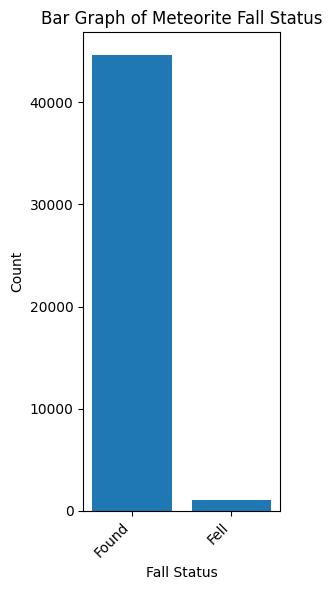

In [ ]:
import matplotlib.pyplot as plt
fall_counts = df['fall'].value_counts()

plt.figure(figsize=(3, 6))
plt.bar(fall_counts.index, fall_counts.values)
plt.xlabel('Fall Status')
plt.ylabel('Count')
plt.title('Bar Graph of Meteorite Fall Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass (g),131
fall,0
year,291
reclat,7315
reclong,7315
GeoLocation,7315


# reverse geocode without unaccounted

In [ ]:
lats = df['reclat'].dropna().tolist()
lons = df['reclong'].dropna().tolist()
coords = list(zip(lats, lons))
coords
reversed = reverse_geocode.search(coords)
reversed
import pandas as pd
r_df = pd.DataFrame(reversed)
r_df

,country_code,city,latitude,longitude,population,state,county,country
0,DE,Aachen,50.77664,6.08342,265208,North Rhine-Westphalia,Regierungsbezirk Köln,Germany
1,DK,Århus,56.15674,10.21076,285273,Central Jutland,Aarhus Kommune,Denmark
2,CA,Lamont,53.76686,-112.80195,1774,Alberta,NaN,Canada
3,MX,Acapulco de Juárez,16.84942,-99.90891,673479,Guerrero,NaN,Mexico
4,AR,Achiras,-33.17685,-64.99442,2173,Cordoba,Departamento de Río Cuarto,Argentina
...,...,...,...,...,...,...,...,...
38396,LY,Zillah,28.55099,17.54358,10030,Al Jufrah,NaN,Libyan Arab Jamahiriya
38397,NE,Zinder,13.80716,8.98810,318874,Zinder Region,Ville de Zinder,Niger
38398,CZ,Zlín,49.22645,17.67065,72973,NaN,Okres Zlín,Czech Republic
38399,RU,Veshenskaya,49.63520,41.72450,9303,Rostov,NaN,Russian Federation


In [ ]:
r_df['country'].value_counts().sort_values(ascending=False)

,count
country,
New Zealand,12180
South Africa,6444
Ghana,6215
Oman,3081
French Southern Territories,2494
...,...
Iceland,1
Cuba,1
"Korea, Democratic People's Republic of",1


In [ ]:
r_df.to_csv('r_df.csv', index=False)

In [ ]:
np.savetxt('reversed.csv',
          r_df,
           delimiter = ", ",
           fmt = '% s')

#reverse geocode with unaccounted

In [ ]:
valid_coords = df[df['reclat'].notnull() & df['reclong'].notnull()]
lats = valid_coords['reclat'].tolist()
lons = valid_coords['reclong'].tolist()
coords = list(zip(lats, lons))

reversed = reverse_geocode.search(coords)

valid_coords['country'] = [entry['country'] for entry in reversed]

missing_coords = df[df['reclat'].isnull() | df['reclong'].isnull()]
missing_coords['country'] = "Unaccounted"

result_df = pd.concat([valid_coords, missing_coords], ignore_index=True)

result_df

<ipython-input-7-0152cc92ea61>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_coords['country'] = [entry['country'] for entry in reversed]
<ipython-input-7-0152cc92ea61>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_coords['country'] = "Unaccounted"


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,country
0,Aachen,1,Valid,L5,21.000,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Germany
1,Aarhus,2,Valid,H6,720.000,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Denmark
2,Abee,6,Valid,EH4,107000.000,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Canada
3,Acapulco,10,Valid,Acapulcoite,1914.000,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Mexico
4,Achiras,370,Valid,L6,780.000,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Argentina
...,...,...,...,...,...,...,...,...,...,...,...
45711,Yamato 981086,37708,Valid,H4,5.227,Found,1998.0,NaN,NaN,NaN,Unaccounted
45712,Yamato 981090,37712,Valid,H4,8.682,Found,1998.0,NaN,NaN,NaN,Unaccounted
45713,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN,Unaccounted
45714,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN,Unaccounted


In [ ]:
result_df['country'].value_counts().sort_values(ascending=False)

,count
country,
New Zealand,12180
Unaccounted,7315
South Africa,6444
Ghana,6215
Oman,3081
...,...
"Korea, Democratic People's Republic of",1
Israel,1
Costa Rica,1


#dropping null values

In [ ]:
result_df.isnull().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass (g),131
fall,0
year,291
reclat,7315
reclong,7315
GeoLocation,7315


In [ ]:
result_df = result_df.dropna(subset=['mass (g)', 'year'])
result_df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,country
0,Aachen,1,Valid,L5,21.000,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Germany
1,Aarhus,2,Valid,H6,720.000,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Denmark
2,Abee,6,Valid,EH4,107000.000,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Canada
3,Acapulco,10,Valid,Acapulcoite,1914.000,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Mexico
4,Achiras,370,Valid,L6,780.000,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Argentina
...,...,...,...,...,...,...,...,...,...,...,...
45711,Yamato 981086,37708,Valid,H4,5.227,Found,1998.0,NaN,NaN,NaN,Unaccounted
45712,Yamato 981090,37712,Valid,H4,8.682,Found,1998.0,NaN,NaN,NaN,Unaccounted
45713,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN,Unaccounted
45714,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN,Unaccounted


In [ ]:
result_df.isnull().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass (g),0
fall,0
year,0
reclat,7195
reclong,7195
GeoLocation,7195


#viz to see the fallen meteorites

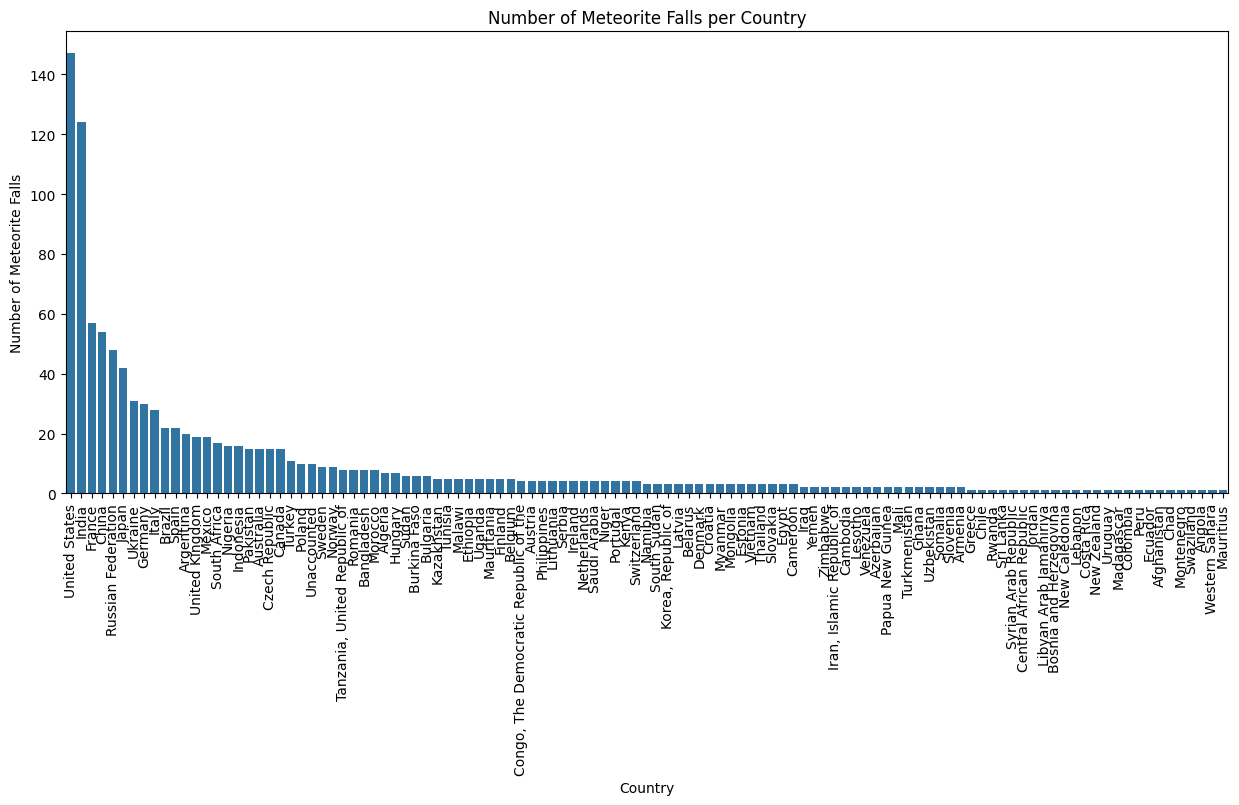

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fell_df = result_df[result_df['fall'] == 'Fell']

plt.figure(figsize=(15, 6))
sns.countplot(x='country', data=fell_df, order=fell_df['country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Meteorite Falls')
plt.title('Number of Meteorite Falls per Country')
plt.show()

#Model Building - Logistic regression

In [ ]:
lr_df = result_df
lr_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,country
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Germany
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Denmark
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Canada
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Mexico
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Argentina


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df_clean = lr_df.drop(columns=['reclat', 'reclong', 'nametype', 'GeoLocation'])

label_encoder = LabelEncoder()
df_clean['recclass'] = label_encoder.fit_transform(df_clean['recclass'])
df_clean['country'] = label_encoder.fit_transform(df_clean['country'])

df_clean = df_clean.dropna()

df_clean['fall'] = df_clean['fall'].map({'Fell': 1, 'Found': 0})

X = df_clean.drop(columns=['fall', 'name', 'id'])
y = df_clean['fall']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

logreg = LogisticRegression(max_iter= 1000)
logreg.fit(X_train, y_train)

y_valid_pred = logreg.predict(X_valid)
y_test_pred = logreg.predict(X_test)

print("Validation Set Evaluation:")
print(classification_report(y_valid, y_valid_pred))

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {accuracy:.4f}')

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6629
           1       0.00      0.00      0.00       167

    accuracy                           0.98      6796
   macro avg       0.49      0.50      0.49      6796
weighted avg       0.95      0.98      0.96      6796

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6620
           1       0.00      0.00      0.00       177

    accuracy                           0.97      6797
   macro avg       0.49      0.50      0.49      6797
weighted avg       0.95      0.97      0.96      6797

Test Set Accuracy: 0.9740


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df_clean = lr_df.drop(columns=['reclat', 'reclong', 'nametype', 'GeoLocation'])

label_encoder = LabelEncoder()
df_clean['recclass'] = label_encoder.fit_transform(df_clean['recclass'])
df_clean['country'] = label_encoder.fit_transform(df_clean['country'])

df_clean = df_clean.dropna()

df_clean['fall'] = df_clean['fall'].map({'Fell': 1, 'Found': 0})

X = df_clean.drop(columns=['fall', 'name', 'id'])
y = df_clean['fall']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

y_valid_pred = logreg.predict(X_valid)
y_test_pred = logreg.predict(X_test)

print("Validation Set Evaluation:")
print(classification_report(y_valid, y_valid_pred))

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {accuracy:.4f}')

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6629
           1       0.35      0.80      0.49       167

    accuracy                           0.96      6796
   macro avg       0.67      0.88      0.73      6796
weighted avg       0.98      0.96      0.97      6796

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6620
           1       0.34      0.77      0.47       177

    accuracy                           0.96      6797
   macro avg       0.67      0.86      0.73      6797
weighted avg       0.98      0.96      0.96      6797

Test Set Accuracy: 0.9557


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_clean.head()

,name,id,recclass,mass (g),fall,year,country,encoded_country
0,Aachen,1,323,21.0,1,1880.0,38,38
1,Aarhus,2,187,720.0,1,1951.0,30,30
2,Abee,6,83,107000.0,1,1952.0,19,19
3,Acapulco,10,0,1914.0,1,1976.0,70,70
4,Achiras,370,329,780.0,1,1902.0,3,3


In [ ]:
print("\nLogistic Regression Model Summary:")
print("Intercept:", logreg.intercept_)
print("Coefficients:", logreg.coef_)

feature_importance = pd.DataFrame(logreg.coef_.T, index=X.columns, columns=['Coefficient'])
print("\nFeature Importance:")
print(feature_importance)


Logistic Regression Model Summary:
Intercept: [127.28124333]
Coefficients: [[-7.90287261e-04  7.62564778e-08 -6.39900013e-02 -1.21059015e-02]]

Feature Importance:
           Coefficient
recclass -7.902873e-04
mass (g)  7.625648e-08
year     -6.399000e-02
country  -1.210590e-02


In [ ]:
df_clean.head()

,name,id,recclass,mass (g),fall,year,country
0,Aachen,1,323,21.0,1,1880.0,38
1,Aarhus,2,187,720.0,1,1951.0,30
2,Abee,6,83,107000.0,1,1952.0,19
3,Acapulco,10,0,1914.0,1,1976.0,70
4,Achiras,370,329,780.0,1,1902.0,3


#Country name encoding key

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

result_df['encoded_country'] = label_encoder.fit_transform(result_df['country'])

print(result_df[['country', 'encoded_country']])

country_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nCountry Mapping:")
country_mapping

           country  encoded_country
0          Germany               38
1          Denmark               30
2           Canada               19
3           Mexico               70
4        Argentina                3
...            ...              ...
45711  Unaccounted              116
45712  Unaccounted              116
45713  Unaccounted              116
45714  Unaccounted              116
45715  Unaccounted              116

[45310 rows x 2 columns]

Country Mapping:


<ipython-input-56-407e5cc26d3f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['encoded_country'] = label_encoder.fit_transform(result_df['country'])


{'Afghanistan': 0,
 'Algeria': 1,
 'Angola': 2,
 'Argentina': 3,
 'Armenia': 4,
 'Australia': 5,
 'Austria': 6,
 'Azerbaijan': 7,
 'Bangladesh': 8,
 'Belarus': 9,
 'Belgium': 10,
 'Bolivia': 11,
 'Bosnia and Herzegovina': 12,
 'Botswana': 13,
 'Brazil': 14,
 'Bulgaria': 15,
 'Burkina Faso': 16,
 'Cambodia': 17,
 'Cameroon': 18,
 'Canada': 19,
 'Central African Republic': 20,
 'Chad': 21,
 'Chile': 22,
 'China': 23,
 'Colombia': 24,
 'Congo, The Democratic Republic of the': 25,
 'Costa Rica': 26,
 'Croatia': 27,
 'Cuba': 28,
 'Czech Republic': 29,
 'Denmark': 30,
 'Ecuador': 31,
 'Egypt': 32,
 'Estonia': 33,
 'Ethiopia': 34,
 'Finland': 35,
 'France': 36,
 'French Southern Territories': 37,
 'Germany': 38,
 'Ghana': 39,
 'Greece': 40,
 'Greenland': 41,
 'Guatemala': 42,
 'Honduras': 43,
 'Hungary': 44,
 'Iceland': 45,
 'India': 46,
 'Indonesia': 47,
 'Iran, Islamic Republic of': 48,
 'Iraq': 49,
 'Ireland': 50,
 'Israel': 51,
 'Italy': 52,
 'Jamaica': 53,
 'Japan': 54,
 'Jordan': 55,
 '

#Logistic regression with hyperparameter tuning to handle imbalance in class

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df_clean = lr_df.drop(columns=['reclat', 'reclong', 'nametype', 'GeoLocation'])
label_encoder = LabelEncoder()
df_clean['recclass'] = label_encoder.fit_transform(df_clean['recclass'])
df_clean['country'] = label_encoder.fit_transform(df_clean['country'])
df_clean['fall'] = df_clean['fall'].map({'Fell': 1, 'Found': 0})
df_clean = df_clean.dropna()

X = df_clean.drop(columns=['fall', 'name', 'id'])
y = df_clean['fall']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

y_valid_pred = logreg.predict(X_valid)
y_valid_probs = logreg.predict_proba(X_valid)[:, 1]

y_test_pred = logreg.predict(X_test)
y_test_probs = logreg.predict_proba(X_test)[:, 1]

print("Validation Set Evaluation:")
print(classification_report(y_valid, y_valid_pred))
print(f'Validation ROC-AUC: {roc_auc_score(y_valid, y_valid_probs):.4f}')

print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print(f'Test ROC-AUC: {roc_auc_score(y_test, y_test_probs):.4f}')


Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6635
           1       0.34      0.79      0.47       161

    accuracy                           0.96      6796
   macro avg       0.67      0.88      0.73      6796
weighted avg       0.98      0.96      0.97      6796

Validation ROC-AUC: 0.9043

Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6636
           1       0.35      0.82      0.49       161

    accuracy                           0.96      6797
   macro avg       0.67      0.89      0.73      6797
weighted avg       0.98      0.96      0.97      6797

Test ROC-AUC: 0.9269


#Model Building - Random forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df_clean = lr_df.drop(columns=['reclat', 'reclong', 'nametype', 'GeoLocation'])

label_encoder = LabelEncoder()
df_clean['recclass'] = label_encoder.fit_transform(df_clean['recclass'])
df_clean['country'] = label_encoder.fit_transform(df_clean['country'])

df_clean = df_clean.dropna()

df_clean['fall'] = df_clean['fall'].map({'Fell': 1, 'Found': 0})

X = df_clean.drop(columns=['fall', 'name', 'id'])
y = df_clean['fall']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

y_valid_pred = rf_model.predict(X_valid)
y_test_pred = rf_model.predict(X_test)

print("Validation Set Evaluation:")
print(classification_report(y_valid, y_valid_pred))

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {test_accuracy:.4f}')

feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6635
           1       0.85      0.65      0.73       161

    accuracy                           0.99      6796
   macro avg       0.92      0.82      0.86      6796
weighted avg       0.99      0.99      0.99      6796

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6636
           1       0.79      0.65      0.71       161

    accuracy                           0.99      6797
   macro avg       0.89      0.82      0.85      6797
weighted avg       0.99      0.99      0.99      6797

Test Set Accuracy: 0.9875

Feature Importance:
          Importance
year        0.404366
country     0.243926
mass (g)    0.187498
recclass    0.164210


#Model Building -Decision tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df_clean = lr_df.drop(columns=['reclat', 'reclong', 'nametype', 'GeoLocation'])

label_encoder = LabelEncoder()
df_clean['recclass'] = label_encoder.fit_transform(df_clean['recclass'])
df_clean['country'] = label_encoder.fit_transform(df_clean['country'])

df_clean = df_clean.dropna()

df_clean['fall'] = df_clean['fall'].map({'Fell': 1, 'Found': 0})

X = df_clean.drop(columns=['fall', 'name', 'id'])
y = df_clean['fall']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

y_valid_pred = dt_model.predict(X_valid)
y_test_pred = dt_model.predict(X_test)

print("Validation Set Evaluation:")
print(classification_report(y_valid, y_valid_pred))

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {test_accuracy:.4f}')

feature_importance = pd.DataFrame(dt_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6635
           1       0.74      0.57      0.64       161

    accuracy                           0.98      6796
   macro avg       0.86      0.78      0.82      6796
weighted avg       0.98      0.98      0.98      6796

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6636
           1       0.68      0.58      0.62       161

    accuracy                           0.98      6797
   macro avg       0.83      0.79      0.81      6797
weighted avg       0.98      0.98      0.98      6797

Test Set Accuracy: 0.9835

Feature Importance:
          Importance
year        0.552792
country     0.331433
mass (g)    0.058730
recclass    0.057045


#Model Building - KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df_clean = lr_df.drop(columns=['reclat', 'reclong', 'nametype', 'GeoLocation'])

label_encoder = LabelEncoder()
df_clean['recclass'] = label_encoder.fit_transform(df_clean['recclass'])
df_clean['country'] = label_encoder.fit_transform(df_clean['country'])

df_clean = df_clean.dropna()

df_clean['fall'] = df_clean['fall'].map({'Fell': 1, 'Found': 0})

X = df_clean.drop(columns=['fall', 'name', 'id'])
y = df_clean['fall']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_valid_pred = knn_model.predict(X_valid)
y_test_pred = knn_model.predict(X_test)

print("Validation Set Evaluation:")
print(classification_report(y_valid, y_valid_pred))

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {test_accuracy:.4f}')


Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6635
           1       0.76      0.59      0.66       161

    accuracy                           0.99      6796
   macro avg       0.88      0.79      0.83      6796
weighted avg       0.98      0.99      0.99      6796

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6636
           1       0.70      0.58      0.63       161

    accuracy                           0.98      6797
   macro avg       0.85      0.79      0.81      6797
weighted avg       0.98      0.98      0.98      6797

Test Set Accuracy: 0.9843


In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(knn_model, X_valid, y_valid, scoring='accuracy', random_state=42)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Permutation Importance):")
print(feature_importance)



Feature Importance (Permutation Importance):
    Feature  Importance
2      year    0.067805
3   country    0.039347
0  recclass    0.007240
1  mass (g)    0.000412


#Anomaly detection - Isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

df_clean = lr_df.drop(columns=['reclat', 'reclong', 'nametype', 'GeoLocation'])
label_encoder = LabelEncoder()
df_clean['recclass'] = label_encoder.fit_transform(df_clean['recclass'])
df_clean['country'] = label_encoder.fit_transform(df_clean['country'])
df_clean['fall'] = df_clean['fall'].map({'Fell': 1, 'Found': 0})
df_clean = df_clean.dropna()

X = df_clean.drop(columns=['fall', 'name', 'id'])
y = df_clean['fall']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

isolation_forest = IsolationForest(n_estimators=100, contamination=0.025)
isolation_forest.fit(X_train)

train_scores = isolation_forest.decision_function(X_train)
valid_scores = isolation_forest.decision_function(X_valid)
test_scores = isolation_forest.decision_function(X_test)

threshold = np.percentile(train_scores, 2)
y_train_pred = (train_scores < threshold).astype(int)
y_valid_pred = (valid_scores < threshold).astype(int)
y_test_pred = (test_scores < threshold).astype(int)

print("Validation Set Evaluation:")
print(classification_report(y_valid, y_valid_pred, target_names=['Found', 'Fell']))
print(f"Validation ROC-AUC: {roc_auc_score(y_valid, y_valid_pred):.4f}")
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_valid, y_valid_pred))

print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred, target_names=['Found', 'Fell']))
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_pred):.4f}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Validation Set Evaluation:
              precision    recall  f1-score   support

       Found       0.99      0.99      0.99      6635
        Fell       0.43      0.39      0.41       161

    accuracy                           0.97      6796
   macro avg       0.71      0.69      0.70      6796
weighted avg       0.97      0.97      0.97      6796

Validation ROC-AUC: 0.6895

Confusion Matrix (Validation):
[[6553   82]
 [  98   63]]

Test Set Evaluation:
              precision    recall  f1-score   support

       Found       0.98      0.99      0.98      6636
        Fell       0.34      0.25      0.29       161

    accuracy                           0.97      6797
   macro avg       0.66      0.62      0.64      6797
weighted avg       0.97      0.97      0.97      6797

Test ROC-AUC: 0.6183

Confusion Matrix (Test):
[[6557   79]
 [ 121   40]]


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

df_clean = lr_df.drop(columns=['reclat', 'reclong', 'nametype', 'GeoLocation'])

label_encoder = LabelEncoder()
df_clean['recclass'] = label_encoder.fit_transform(df_clean['recclass'])
df_clean['country'] = label_encoder.fit_transform(df_clean['country'])
df_clean = df_clean.dropna()

scaler = StandardScaler()
X = df_clean.drop(columns=['fall', 'name', 'id'])
X_scaled = scaler.fit_transform(X)

isolation_forest = IsolationForest(n_estimators=100, contamination=0.025, random_state=42)
isolation_forest.fit(X_scaled)

anomaly_scores = isolation_forest.decision_function(X_scaled)
anomaly_predictions = isolation_forest.predict(X_scaled)

anomaly_predictions = np.where(anomaly_predictions == -1, 1, 0)

df_clean['anomaly_score'] = anomaly_scores
df_clean['anomaly_prediction'] = anomaly_predictions

y_true = df_clean['fall'].map({'Fell': 1, 'Found': 0})
print("Classification Report:")
print(classification_report(y_true, anomaly_predictions, target_names=['Found', 'Fell']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, anomaly_predictions))


Classification Report:
              precision    recall  f1-score   support

       Found       0.99      0.98      0.98     44235
        Fell       0.39      0.41      0.40      1075

    accuracy                           0.97     45310
   macro avg       0.69      0.70      0.69     45310
weighted avg       0.97      0.97      0.97     45310


Confusion Matrix:
[[43542   693]
 [  635   440]]


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import IsolationForest

results = permutation_importance(
    isolation_forest,
    X_train,
    y_train,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc'
)

feature_importances = results.importances_mean

import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

    Feature  Importance
0  recclass   -0.003631
3   country   -0.020997
1  mass (g)   -0.047961
2      year   -0.108039


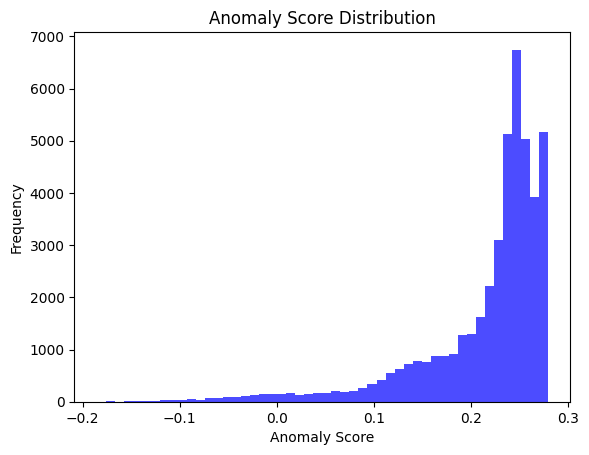

In [ ]:
import matplotlib.pyplot as plt

plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.7)
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
anomalies = df_clean[df_clean['anomaly_prediction'] == 1]
print("Top Anomalous Meteorites:")
print(anomalies.head())

Top Anomalous Meteorites:
        name   id  recclass  mass (g)  fall    year  country  anomaly_score  \
2       Abee    6        83  107000.0  Fell  1952.0       19      -0.077300   
4    Achiras  370       329     780.0  Fell  1902.0        3      -0.010563   
7       Agen  392       180   30000.0  Fell  1814.0       36      -0.075234   
14  Akbarpur  427       171    1800.0  Fell  1838.0       46      -0.017605   
19     Alais  448        27    6000.0  Fell  1806.0       36      -0.092021   

    anomaly_prediction  
2                    1  
4                    1  
7                    1  
14                   1  
19                   1  


#Country visualization


Country Mapping:
{'Afghanistan': 0, 'Algeria': 1, 'Angola': 2, 'Argentina': 3, 'Armenia': 4, 'Australia': 5, 'Austria': 6, 'Azerbaijan': 7, 'Bangladesh': 8, 'Belarus': 9, 'Belgium': 10, 'Bolivia': 11, 'Bosnia and Herzegovina': 12, 'Botswana': 13, 'Brazil': 14, 'Bulgaria': 15, 'Burkina Faso': 16, 'Cambodia': 17, 'Cameroon': 18, 'Canada': 19, 'Central African Republic': 20, 'Chad': 21, 'Chile': 22, 'China': 23, 'Colombia': 24, 'Congo, The Democratic Republic of the': 25, 'Costa Rica': 26, 'Croatia': 27, 'Cuba': 28, 'Czech Republic': 29, 'Denmark': 30, 'Ecuador': 31, 'Egypt': 32, 'Estonia': 33, 'Ethiopia': 34, 'Finland': 35, 'France': 36, 'French Southern Territories': 37, 'Germany': 38, 'Ghana': 39, 'Greece': 40, 'Greenland': 41, 'Guatemala': 42, 'Honduras': 43, 'Hungary': 44, 'Iceland': 45, 'India': 46, 'Indonesia': 47, 'Iran, Islamic Republic of': 48, 'Iraq': 49, 'Ireland': 50, 'Israel': 51, 'Italy': 52, 'Jamaica': 53, 'Japan': 54, 'Jordan': 55, 'Kazakhstan': 56, 'Kenya': 57, "Korea, 

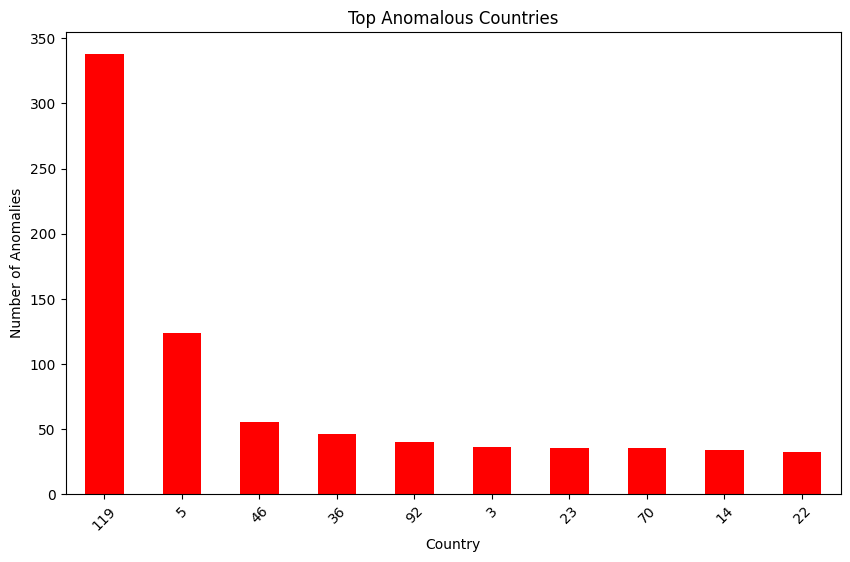

In [ ]:
country_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nCountry Mapping:")
print(country_mapping)

country_anomalies['country'] = label_encoder.inverse_transform(country_anomalies.index)

top_anomalous_countries = country_anomalies.sort_values('total_anomalies', ascending=False).head(10)

print("Top Anomalous Countries:")
print(top_anomalous_countries)

top_anomalous_countries[['total_anomalies']].plot(
    kind='bar', figsize=(10, 6), legend=False, color='red'
)
plt.title('Top Anomalous Countries')
plt.xlabel('Country')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.show()


#Year visualization

Top Anomalous Years:
        total_meteorites  total_anomalies  anomaly_proportion
year                                                         
1937.0                52               17                0.33
1868.0                16               16                1.00
1887.0                21               16                0.76
1903.0                22               15                0.68
1863.0                15               14                0.93
1890.0                20               13                0.65
1869.0                12               12                1.00
1914.0                18               12                0.67
1938.0                45               11                0.24
1888.0                15               11                0.73


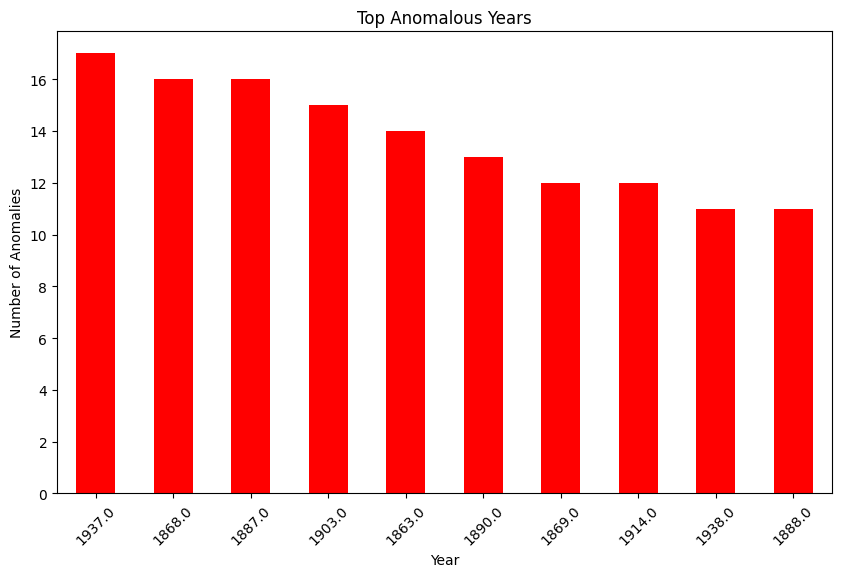

In [ ]:
year_anomalies = df_clean.groupby('year').agg(
    total_meteorites=('anomaly_prediction', 'count'),
    total_anomalies=('anomaly_prediction', lambda x: (x == 1).sum())
)

year_anomalies['anomaly_proportion'] = (year_anomalies['total_anomalies'] / year_anomalies['total_meteorites']).round(2)

top_anomalous_years = year_anomalies.sort_values('total_anomalies', ascending=False).head(10)

print("Top Anomalous Years:")
print(top_anomalous_years)

top_anomalous_years[['total_anomalies']].plot(
    kind='bar', figsize=(10, 6), legend=False, color='red'
)
plt.title('Top Anomalous Years')
plt.xlabel('Year')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.show()

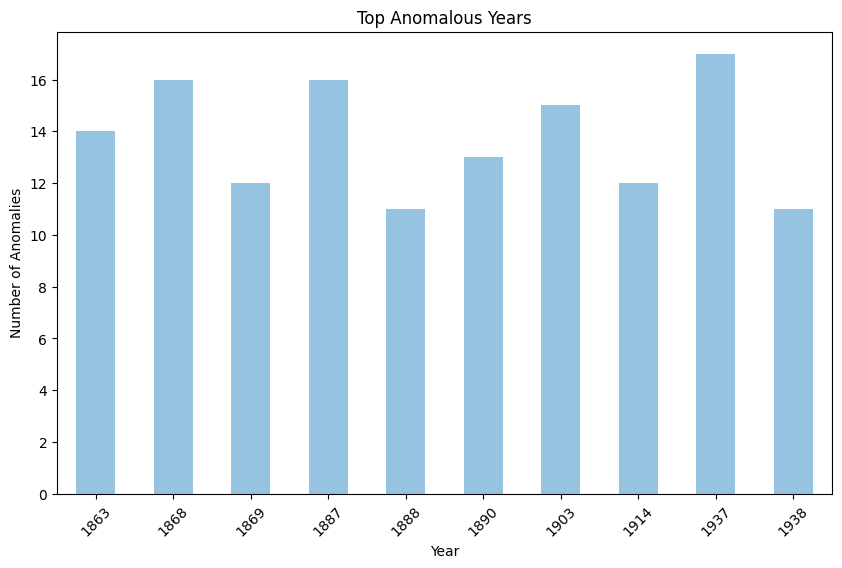

In [ ]:
year_anomalies = df_clean.groupby('year').agg(
    total_meteorites=('anomaly_prediction', 'count'),
    total_anomalies=('anomaly_prediction', lambda x: (x == 1).sum())
)

year_anomalies['anomaly_proportion'] = (year_anomalies['total_anomalies'] / year_anomalies['total_meteorites']).round(2)

year_anomalies.index = year_anomalies.index.astype(int)

top_anomalous_years = year_anomalies.sort_values('total_anomalies', ascending=False).head(10)

palette = sns.color_palette("Blues_d", n_colors=len(top_anomalous_years))

top_anomalous_years = top_anomalous_years.sort_index()

top_anomalous_years[['total_anomalies']].plot(
    kind='bar', figsize=(10, 6), legend=False, color=palette
)
plt.title('Top Anomalous Years')
plt.xlabel('Year')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.show()


#Mass (g) visualization

Top Anomalous Masses:
          total_meteorites  total_anomalies  anomaly_proportion
mass (g)                                                       
100000.0                23               16            0.695652
1500.0                  32               14            0.437500
20000.0                 24               13            0.541667
2000.0                  40               11            0.275000
200000.0                11               11            1.000000
4000.0                  32               11            0.343750
50000.0                 17               10            0.588235
5000.0                  29               10            0.344828
150000.0                10                9            0.900000
3000.0                  23                9            0.391304


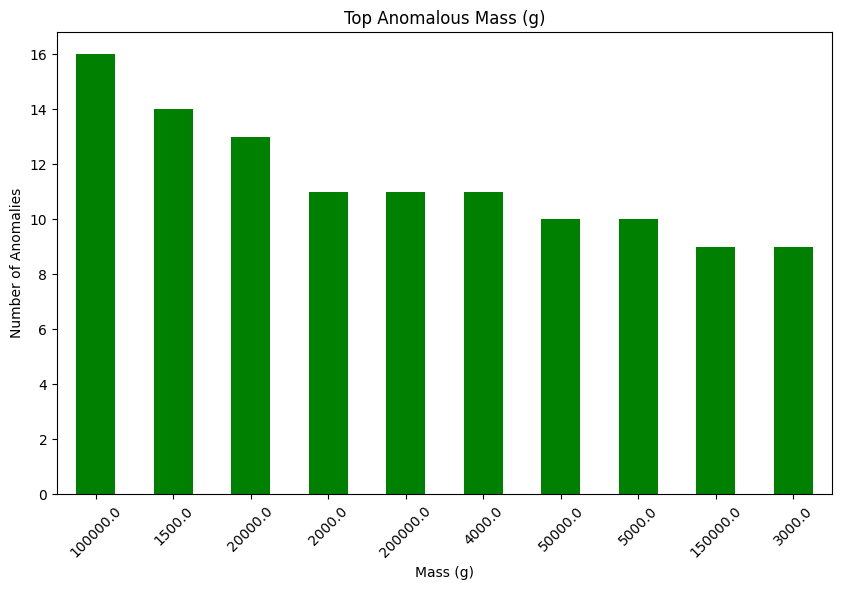

In [ ]:
mass_anomalies = df_clean.groupby('mass (g)').agg(
    total_meteorites=('anomaly_prediction', 'count'),
    total_anomalies=('anomaly_prediction', lambda x: (x == 1).sum())
)

mass_anomalies['anomaly_proportion'] = mass_anomalies['total_anomalies'] / mass_anomalies['total_meteorites']

top_anomalous_masses = mass_anomalies.sort_values('total_anomalies', ascending=False).head(10)

print("Top Anomalous Masses:")
print(top_anomalous_masses)

top_anomalous_masses[['total_anomalies']].plot(
    kind='bar', figsize=(10, 6), legend=False, color='green'
)
plt.title('Top Anomalous Mass (g)')
plt.xlabel('Mass (g)')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.show()

<ipython-input-47-6a08eeb3de4e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mass_category_anomalies = df_clean.groupby('mass_category').agg(


Top Anomalous Mass Categories:
               total_meteorites  total_anomalies  anomaly_proportion
mass_category                                                       
1000-5000g                 2789              174            0.062388
5000-10000g                 638               89            0.139498
100-500g                   8249               39            0.004728
500-1000g                  2191               34            0.015518
10-100g                   16285               24            0.001474
0-10g                     13796                9            0.000652


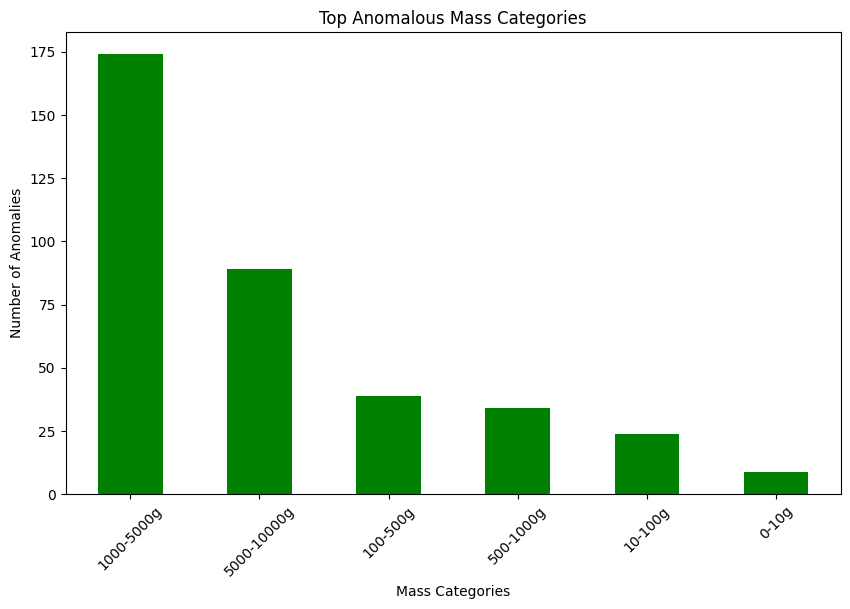

In [ ]:
mass_bins = [0, 10, 100, 500, 1000, 5000, 10000]
mass_labels = ['0-10g', '10-100g', '100-500g', '500-1000g', '1000-5000g', '5000-10000g']
df_clean['mass_category'] = pd.cut(df_clean['mass (g)'], bins=mass_bins, labels=mass_labels)

mass_category_anomalies = df_clean.groupby('mass_category').agg(
    total_meteorites=('anomaly_prediction', 'count'),
    total_anomalies=('anomaly_prediction', lambda x: (x == 1).sum())
)

mass_category_anomalies['anomaly_proportion'] = mass_category_anomalies['total_anomalies'] / mass_category_anomalies['total_meteorites']

top_anomalous_mass_categories = mass_category_anomalies.sort_values('total_anomalies', ascending=False)

print("Top Anomalous Mass Categories:")
print(top_anomalous_mass_categories)

top_anomalous_mass_categories[['total_anomalies']].plot(
    kind='bar', figsize=(10, 6), legend=False, color='green'
)
plt.title('Top Anomalous Mass Categories')
plt.xlabel('Mass Categories')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.show()

#End of code book